In [1]:
!qbraid jobs enable qbraid_sdk

You have already enabled qBraid Quantum Jobs in the qbraid_sdk environment.


In [2]:
from qbraid import get_devices

In [3]:
get_devices()

Provider,Name,qBraid ID,Status
AWS,DM1,aws_dm_sim,●
AWS,SV1,aws_sv_sim,●
AWS,TN1,aws_tn_sim,●
IBM,Belem,ibm_q_belem,●
IBM,Ext. stabilizer simulator,ibm_q_simulator_extended_stabilizer,●
IBM,Jakarta,ibm_q_jakarta,●
IBM,Lagos,ibm_q_lagos,●
IBM,Lima,ibm_q_lima,●
IBM,MPS simulator,ibm_q_simulator_mps,●
IBM,Manila,ibm_q_manila,●


In [10]:
%pip install amazon-braket-sdk==1.37.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.2/251.2 kB 5.3 MB/s eta 0:00:0000:01
  Attempting uninstall: amazon-braket-sdk
    Found existing installation: amazon-braket-sdk 1.29.3
    Uninstalling amazon-braket-sdk-1.29.3:
      Successfully uninstalled amazon-braket-sdk-1.29.3

[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
from qbraid import device_wrapper, job_wrapper, get_jobs
# from qbraid.api import verify_config

In [5]:
qbraid_device = device_wrapper("aws_ionq")
qbraid_device.info

{'numberQubits': 11,
 'objRef': None,
 'pendingJobs': 'N/A',
 'availabilityCD': '03:12:57',
 'visibility': 'public',
 'qbraid_id': 'aws_ionq',
 'name': 'IonQ Device',
 'provider': 'IonQ',
 'paradigm': 'gate-based',
 'type': 'QPU',
 'dateDeployed': '2019',
 'location': 'College Park, MD, USA',
 'vendor': 'AWS',
 'runPackage': 'braket',
 'status': 'OFFLINE',
 'createdAt': '2022-03-10T04:08:21.014Z',
 'updatedAt': '2023-05-01T09:47:03.845Z',
 '__v': 0,
 'architecture': 'trapped ion'}

In [7]:
verify_config("AWS")

NameError: name 'verify_config' is not defined

In [3]:
ionq_id = "aws_ionq"
qbraid_aws_device = device_wrapper(ionq_id)
qbraid_aws_device.vendor_dlo

Device('name': IonQ Device, 'arn': arn:aws:braket:::device/qpu/ionq/ionQdevice)

In [7]:
from qiskit import QuantumCircuit
import numpy as np

qiskit_circuit = QuantumCircuit(1, 1)

qiskit_circuit.h(0)
qiskit_circuit.ry(np.pi / 4, 0)
qiskit_circuit.rz(np.pi / 2, 0)
qiskit_circuit.measure(0, 0)

qiskit_circuit.draw()

┌───┐┌─────────┐┌─────────┐┌─┐
  q: ┤ H ├┤ Ry(π/4) ├┤ Rz(π/2) ├┤M├
     └───┘└─────────┘└─────────┘└╥┘
c: 1/════════════════════════════╩═
                                 0

In [9]:
# shots = 1

# qbraid_aws_job = qbraid_aws_device.run(qiskit_circuit, shots=shots)

In [8]:
from inspect import getsource
print(qbraid_aws_device.estimate_cost(qiskit_circuit))

10.540000000000001


In [13]:
qbraid_aws_job.status()

<JobStatus.COMPLETED: 6>

In [11]:
get_jobs()


In [14]:
aws_result = qbraid_aws_job.result()

In [16]:
dir(type(aws_result))

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 'data',
 'measurement_counts',
 'measurements',
 'plot_counts']

In [18]:
aws_result.measurement_counts()

{'1': 1}

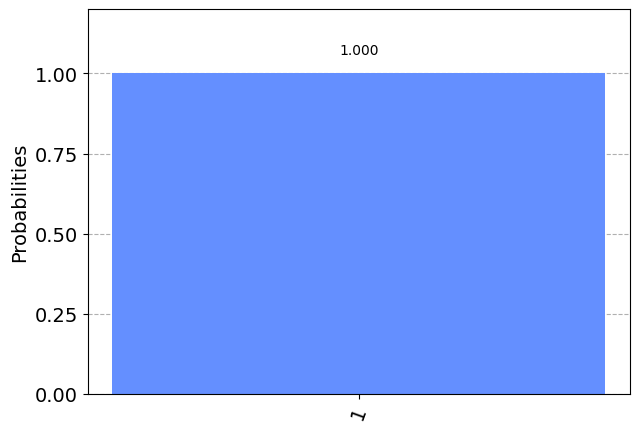

In [15]:
aws_result.plot_counts()